# Causality Tutorial Exercises – Python

Contributors: Rune Christiansen, Jonas Peters, Niklas Pfister, Sorawit Saengkyongam, Sebastian Weichwald.
The MIT License applies; copyright is with the authors.
Some exercises are adapted from "Elements of Causal Inference: Foundations and Learning Algorithms" by J. Peters, D. Janzing and B. Schölkopf.


# Exercise 1 – Structural Causal Model



Let's first draw a sample from an SCM

In [8]:
import numpy as np

# set seed
np.random.seed(1)

rnorm = lambda n: np.random.normal(size=n)

n = 200
C = rnorm(n)
A = .8 * rnorm(n)
K = A + .1 * rnorm(n)
X = C - 2 * A + .2 * rnorm(n)
F = 3 * X + .8 * rnorm(n)
D = -2 * X + .5 * rnorm(n)
G = D + .5 * rnorm(n)
Y = 2 * K - D + .2 * rnorm(n)
H = .5 * Y + .1 * rnorm(n)

data = np.c_[C, A, K, X, F, D, G, Y, H]

__a)__

What are the parents and children of $X$ in the above SCM ?

Take a pair of variables and think about whether you expect this pair to be dependent
(at this stage, you can only guess, later you will have tools to know). Check empirically.

__b)__

Generate a sample of size 300 from the interventional distribution $P_{\mathrm{do}(X=\mathcal{N}(2, 1))}$
and store the data matrix as `data_int`.

In [9]:
# a)
# PA(X) = {A, C}
# CH(X) = {F, D}

# b)

rnorm = lambda n: np.random.normal(size=n)

n = 300
C = rnorm(n)
A = .8 * rnorm(n)
K = A + .1 * rnorm(n)
#X = C - 2 * A + .2 * rnorm(n)
X = rnorm(n) + 2
F = 3 * X + .8 * rnorm(n)
D = -2 * X + .5 * rnorm(n)
G = D + .5 * rnorm(n)
Y = 2 * K - D + .2 * rnorm(n)
H = .5 * Y + .1 * rnorm(n)

data_int = np.c_[C, A, K, X, F, D, G, Y, H]

__c)__

Do you expect the marginal distribution of $Y$ to be different in both samples?

yes

__d)__

Do you expect the joint distribution of $(A, Y)$ to be different in both samples?


yes

__e)__

Check your answers to c) and d) empirically.

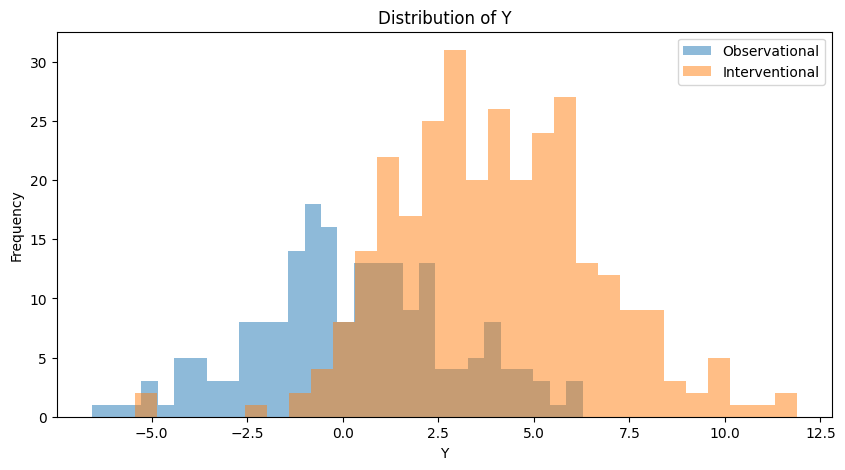

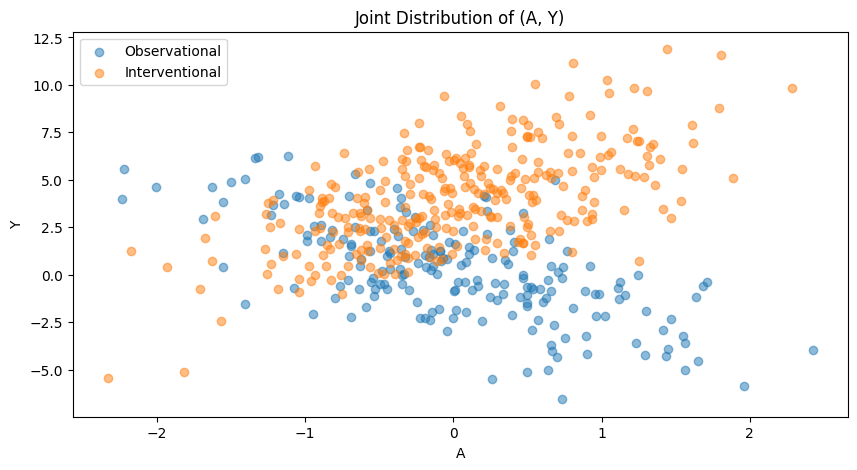

In [11]:
import matplotlib.pyplot as plt

# a)
# PA(X) = {A, C}
# CH(X) = {F, D}

# b)

rnorm = lambda n: np.random.normal(size=n)

n = 300
C = rnorm(n)
A = .8 * rnorm(n)
K = A + .1 * rnorm(n)
#X = C - 2 * A + .2 * rnorm(n)
X = rnorm(n) + 2
F = 3 * X + .8 * rnorm(n)
D = -2 * X + .5 * rnorm(n)
G = D + .5 * rnorm(n)
Y = 2 * K - D + .2 * rnorm(n)
H = .5 * Y + .1 * rnorm(n)

data_int = np.c_[C, A, K, X, F, D, G, Y, H]

# c) and d) empirical check

# Index for Y and A in the data arrays
Y_idx = 7
A_idx = 1

# Plot histogram of Y for both datasets
plt.figure(figsize=(10, 5))
plt.hist(data[:, Y_idx], bins=30, alpha=0.5, label='Observational')
plt.hist(data_int[:, Y_idx], bins=30, alpha=0.5, label='Interventional')
plt.title('Distribution of Y')
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot scatter plot of (A, Y) for both datasets
plt.figure(figsize=(10, 5))
plt.scatter(data[:, A_idx], data[:, Y_idx], alpha=0.5, label='Observational')
plt.scatter(data_int[:, A_idx], data_int[:, Y_idx], alpha=0.5, label='Interventional')
plt.title('Joint Distribution of (A, Y)')
plt.xlabel('A')
plt.ylabel('Y')
plt.legend()
plt.show()

# Exercise 2 – Adjusting


![DAG](https://raw.githubusercontent.com/sweichwald/causality-tutorial-exercises/main/data/Exercise-ANM.png)

Suppose we are given a fixed DAG (like the one above).

a) What are valid adjustment sets (VAS) used for?

b) Assume we want to find a VAS for the causal effect from $X$ to $Y$.
What are general recipies (plural 😉) for constructing VASs (no proof)?
Which sets are VAS in the DAG above?

c) The following code samples from an SCM. Perform linear regressions using different VAS and compare the regression coefficient against the causal effect from $X$ to $Y$.


In [ ]:
import numpy as np

# set seed
np.random.seed(1)

rnorm = lambda n: np.random.normal(size=n)

n = 200
C = rnorm(n)
A = .8 * rnorm(n)
K = A + .1 * rnorm(n)
X = C - 2 * A + .2 * rnorm(n)
F = 3 * X + .8 * rnorm(n)
D = -2 * X + .5 * rnorm(n)
G = D + .5 * rnorm(n)
Y = 2 * K - D + .2 * rnorm(n)
H = .5 * Y + .1 * rnorm(n)

data = np.c_[C, A, K, X, F, D, G, Y, H]

d) Why could it be interesting to have several options for choosing a VAS?

e) If you indeed have access to several VASs, what would you do?

# Exercise 3 – Independence-based Causal Structure Learning

__a)__

Assume $P^{X,Y,Z}$ is Markov and faithful wrt. $G$. Assume all (!) conditional independences are

$$
\newcommand{\indep}{{\,⫫\,}}
\newcommand{\dep}{\not{}\!\!\indep}
$$

$$X \dep Z \mid \emptyset$$

(plus symmetric statements). What is $G$?

__b)__

Assume $P^{W,X,Y,Z}$ is Markov and faithful wrt. $G$. Assume all (!) conditional independences are

$$\begin{aligned}
(Y,Z) &\indep W \mid \emptyset \\
W &\indep Y \mid (X,Z) \\
(X,W) &\indep Y | Z
\end{aligned}
$$

(plus symmetric statements). What is $G$?

# Exercise 4 – Additive Noise Models

Set-up required packages:

In [ ]:
# set up – not needed when run on mybinder
# if needed (colab), change False to True and run cell
if False:
  !mkdir ../data/
  !wget https://raw.githubusercontent.com/sweichwald/causality-tutorial-exercises/main/data/Exercise-ANM.csv -q -O ../data/Exercise-ANM.csv
  !wget https://raw.githubusercontent.com/sweichwald/causality-tutorial-exercises/main/python/kerpy/__init__.py -q -O kerpy.py
  !pip install pygam

In [ ]:
from kerpy import hsic
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pygam import GAM, s

Let's load and plot some real data set:

In [ ]:
data = pd.read_csv('../data/Exercise-ANM.csv')

plt.scatter(data["X"].values, data["Y"].values, s=2.);

__a)__

Do you believed that $X \to Y$ or that $X \gets Y$? Why?

Double-click (or enter) to edit

$$
\newcommand{\indep}{{\,⫫\,}}
\newcommand{\dep}{\not{}\!\!\indep}
$$

__b)__
Let us now try to get a more statistical answer. We have heard that we cannot
have  
$$Y = f(X) + N_Y,\ N_Y \indep X$$
and
$$X = g(Y) + N_X,\ N_X \indep Y$$
at the same time.

Given a data set over $(X,Y)$,
we now want to decide for one of the two models.

Come up with a method to do so.

Hints:
* `GAM(s(0)).fit(A, B).deviance_residuals(A, B)` provides residuals when regressing $B$ on $A$.
* `hsic(a, b)` can be used as an independence test (here, `a` and `b` are $n \times 1$ numpy arrays).

__c)__

Assume that the error terms are Gaussian with zero mean and variances
$\sigma_X^2$ and $\sigma_Y^2$, respectively.
The maximum likelihood for DAG G is
then proportional to
$-\log(\mathrm{var}(R^G_X)) - \log(\mathrm{var}(R^G_Y))$,
where $R^G_X$ and $R^G_Y$ are the residuals obtained from regressing $X$ and $Y$ on
their parents in $G$, respectively (no proof).

Find the maximum likelihood solution.

# Exercise 5 – Invariant Causal Prediction

Set-up required packages and data:

In [ ]:
# set up – not needed when run on mybinder
# if needed (colab), change False to True and run cell
if False:
  !mkdir ../data/
  !wget https://raw.githubusercontent.com/sweichwald/causality-tutorial-exercises/main/data/Exercise-ICP.csv -q -O ../data/Exercise-ICP.csv

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

__a)__

Generate some observational and interventional data:

In [ ]:
# Generate n=1000 observations from the observational distribution
na = 1000
Xa = np.random.normal(size=na)
Ya = 1.5*Xa + np.random.normal(size=na)

# Generate n=1000 observations from an interventional distribution
nb = 1000
Xb = np.random.normal(loc=2, scale=1, size=nb)
Yb = 1.5*Xb + np.random.normal(size=nb)

# plot Y vs X1
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(Xa, Ya, label='observational', marker='o', alpha=0.6)
ax.scatter(Xb, Yb, label='interventional', marker ='^', alpha=0.6)
ax.legend();

Look at the above plot. Is the predictor $\{X\}$ an invariant set, that is (roughly speaking), does $Y \mid X = x$ have the same distribution in the orange and blue data?

Double-click (or enter) to edit

__b)__

We now consider data over a response and three covariates $X1, X2$, and $X3$
and try to infer $\mathrm{pa}(Y)$. To do so, we need to find all sets for which this
invariance is satisfied.

In [ ]:
# load data
data = pd.read_csv('../data/Exercise-ICP.csv')
data['env'] = np.concatenate([np.repeat('observational', 140), np.repeat('interventional', 80)])
# pairplot
sns.pairplot(data, hue='env', height=2, plot_kws={'alpha':0.6});

In [ ]:
# The code below plots the residuals versus fitted values for all sets of
# predictors.
# extract response and predictors

Y = data['Y'].to_numpy()
X = data[['X1','X2','X3']].to_numpy()
# get environment indicator
obs_ind = data[data['env'] == 'observational'].index
int_ind = data[data['env'] == 'interventional'].index
# create all sets
all_sets = [(0,), (1,), (2,), (0,1), (0,2), (1,2), (0,1,2)]
# label each set
set_labels = ['X1', 'X2', 'X3', 'X1,X2', 'X1,X3', 'X2,X3', 'X1,X2,X3']

# fit OLS and store fitted values and residuals for each set
fitted = []
resid = []
for s in all_sets:
  model = sm.OLS(Y, X[:, s]).fit()
  fitted += [model.fittedvalues]
  resid += [model.resid]

# plotting function
def plot_fitted_resid(fv, res, ax, title):
  ax.scatter(fv[obs_ind], res[obs_ind], label='observational', marker='o', alpha=0.6)
  ax.scatter(fv[int_ind], res[int_ind], label='interventional', marker ='^', alpha=0.6)
  ax.legend()
  ax.set_xlabel('fitted values')
  ax.set_ylabel('residuals')
  ax.set_title(title)

# creating plots
fig, axes = plt.subplots(4, 2, figsize=(7,14))

# plot result for the empty set predictor
ax0 = axes[0,0]
ax0.scatter(obs_ind, Y[obs_ind], label='observational', marker='o', alpha=0.6)
ax0.scatter(int_ind, Y[int_ind], label='interventional', marker ='^', alpha=0.6)
ax0.legend()
ax0.set_xlabel('index')
ax0.set_ylabel('Y')
ax0.set_title('empty set')

# plot result for the other sets
for i, ax in enumerate(axes.flatten()[1:]):
  plot_fitted_resid(fitted[i], resid[i], ax, set_labels[i])

# make tight layout
plt.tight_layout()

Which of the sets are invariant? (There are two plots with four scatter plots each.)

Double-click (or enter) to edit

__c)__
What is your best guess for $\mathrm{pa}(Y)$?

Double-click (or enter) to edit

__d) (optional)__

Use the function ICP to check your result.

In [ ]:
# set up – not needed when run on mybinder
# if needed (colab), change False to True and run cell
if False:
  !pip install causalicp

In [ ]:
import causalicp as icp